In [1]:
# THIS EXAMPLE SETS UP A CRPROPA RUN AN DISPLAYS THE RESULTS
%matplotlib inline 
from pylab import *
import numpy as np


# Define source parameters
redshift = np.log10(0.001)
energy   = np.log10(3.e20) # eV
Z = 8  # oxyen
A = 16 # isotope 
num = 10000 # simulate 1000 particles

com = '../01_Yields/crpropa_run.py -E %1.2f -log10_redshift %1.2f -Z %d -A %d -nparticles %d -o example_yield_output -od .'%(energy, redshift, Z, A, num)

import os
os.system(com)

0

In [2]:
# load output file
f = np.load('example_yield_output.npz')
# list the output arrays and their shape
print f.keys()

['A_list', 'nucleon_histograms', 'num_particles', 'neutrino_histogram', 'energy_bins', 'input_energy']


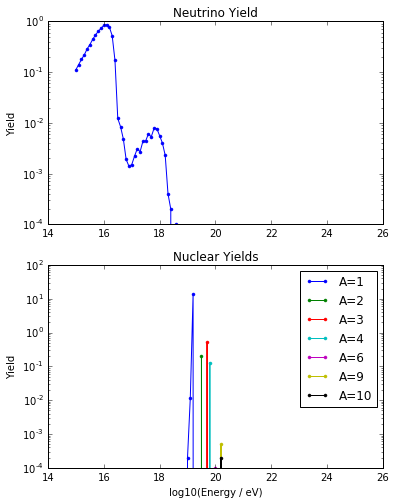

In [3]:
# make some plot
figure(figsize=(6,8))
ax=subplot(211)
ax.set_yscale('log')
delta_bin = np.diff(f['energy_bins'])[0]
plot(f['energy_bins'][1:]-delta_bin, f['neutrino_histogram']/float(f['num_particles']), '.-' )
ylabel('Yield')
title('Neutrino Yield')
ax2=subplot(212)
ax2.set_yscale('log')
for k in range(0,len(f['A_list'])):
    plot(f['energy_bins'][1:]-delta_bin, f['nucleon_histograms'][k]/float(f['num_particles']), '.-', label='A=%d'%(f['A_list'][k]))
legend(loc=0)
title('Nuclear Yields')
xlabel('log10(Energy / eV)')
ylabel('Yield')
    
